How to describe a word?

Answer this question first : How to describe a person?

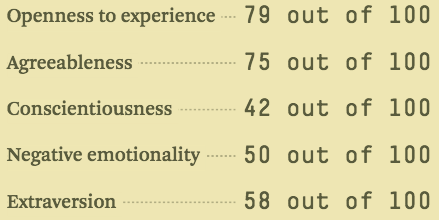

Suppose that Jay has the following score based on the criteria; and there are two others persons are also evaluated: 

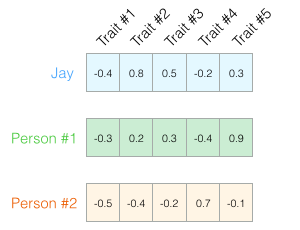

Conlucsion:

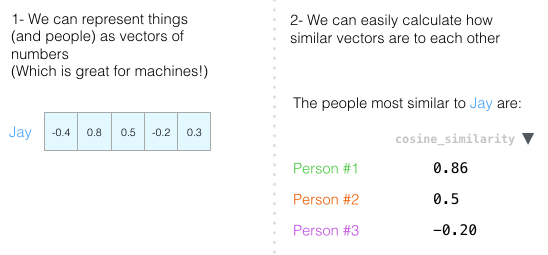

# Playing with embeddings

This article covers the two most common text preprocessing techniques used to convert text into numbers, so the text sentences can be feed to Machine Learning (ML) and Deep Learning (DL) models.

Intelligent models don't take as input raw text, they only work with numeric data. *Vectorizing* text is the process of transforming text into numeric tensors.

There are different ways to vectorize raw text. The top three popular vectorizing methods are:

- Segment text into words, and transform each word into a vector.
- Segment text into characters, and transform each character into a vector.
- Extract n-grams of words or characters, and transform each n-gram into a vector.
 *N-grams* are overlapping groups of multiple consecutive words or characters. [[1]](#references)

The different units which a sentence is split into, are called *tokens*.

All *vectorizing* methods consist of first *tokenizing* the sentence (Split a sentence into different units) and then associating a vector to each *token*.

First, we will introduce *one-hot encoding (OHE)* and then we are going to dive into *word embeddings*, which is the most used word-level *vectorization* mehtod among the DL community.

> Note: Some advanced methods, such as pretrained Transformers (BERT[[2]](#references), RoBERTa[[3]](#references), ...) use *n-grams* level tokenization. That is because n-grams tokenization can efficiently handle with huge vocabularies.

![Vectorization](https://freecontent.manning.com/wp-content/uploads/Chollet_DLfT_01.png)

## One-hot Encoding (OHE)

OHE is the most basic way to convert a token into a vector. It consists of associating a unique integer index with every word and then turning this integer index *i* into a binary vector of size N (the size of the vocabulary); the vector is all zeros except for the *i* th entry, which is 1. [[1]](#references)

We can use scikit-learn(sklearn) to convert tokens into vectors using OHE. To do so, sklearn provides a `OneHotEncoder` class, which like all the other sklearn classes, has a `fit` and `transform` method. These methods do the following tasks:

- `fit`: Learns the vocabulary of our dataset, and learns how to associate a token with an integer index.
- `transform`: Accordingly with the understanding acquired in the `fit` method transforms each token to its associated vector.

In [37]:
import numpy as np
# Import ohe class
from sklearn.preprocessing import OneHotEncoder

# Declare text examples
texts = ['I study Computer Science at university',
         'My dog is called Peludet']

As we explained on the introduction, first we need to tokenize the texts.

We will be working with a word-level tokenization, so we are going to split sentences by `' '` character.

In [38]:
# Split texts by ' '
tokenized_texts = [text.split() for text in texts]
tokenized_texts

[['I', 'study', 'Computer', 'Science', 'at', 'university'],
 ['My', 'dog', 'is', 'called', 'Peludet']]

In [39]:
# Flat the tokens lists so they are stored in a single list
tokenized_texts = [[t] for tokens in tokenized_texts for t in tokens]
tokenized_texts

[['I'],
 ['study'],
 ['Computer'],
 ['Science'],
 ['at'],
 ['university'],
 ['My'],
 ['dog'],
 ['is'],
 ['called'],
 ['Peludet']]

Now we are ready to feed the tokens to sklearn `OneHotEncoder` class `fit` method.


In [40]:
# Create OneHotEncoder instance
ohe = OneHotEncoder()

# Feed the tokens to fit method
ohe.fit(tokenized_texts)

# See what our OneHotEncoder has learned
print('Vocabulary:', ohe.get_feature_names_out())
print('Vocabulary len:', len(ohe.get_feature_names_out()))

Vocabulary: ['x0_Computer' 'x0_I' 'x0_My' 'x0_Peludet' 'x0_Science' 'x0_at'
 'x0_called' 'x0_dog' 'x0_is' 'x0_study' 'x0_university']
Vocabulary len: 11


Once we have tokenized our input sentence, it is time to transform our tokens into vectors.

When working with OHE this process is quite straightforward. Although implementing OHE by hand is trivial, sklearn facilitates, even more, the tasks.

We only need to call `transform` on our fitted `OneHotEncoder` instance.

In [41]:
# Now we can covert out tokens to vectors
## For a more clear example we will only vectorize first sentence
encoded_sentence = ohe.transform(np.array(texts[0].split()).reshape(-1, 1))
for t, v in zip(texts[0].split(), encoded_sentence):
  print('Token: {} -> Vector: {}'.format(t, v.toarray()))

Token: I -> Vector: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Token: study -> Vector: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Token: Computer -> Vector: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Token: Science -> Vector: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Token: at -> Vector: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Token: university -> Vector: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


As we can see each token is associated with an integer value *i*, which corresponds to the array *i*th position which at the time it is set to 1.

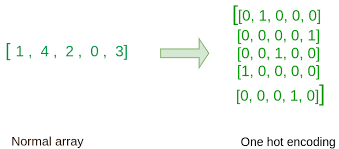

**Even though OHE is simple, it is inefficient**. A one-hot encoded vector is sparse (meaning, most indices are zero). Imagine we have 10,000 words in the vocabulary. To one-hot encode each word, we would create a vector where 99.99% of the elements are zero.

A part from the inefficiency, OHE has another big problem. Imagine that we are trying to vectorize these three words:

- great
- good
- bad

If we vectorize them using OHE we will get this result:

```python
assert good  == [1, 0, 0]
assert great == [0, 1, 0]
assert bad   == [0, 0, 1]
```

In this case, OHE vectorization result is telling us that `good` is as different as `great` and `bad` and actually this is false. So we need another vectorization method that can handle **semantic similarities**, here is where **Word Embeddings** is important.

## Word Embeddings

A more powerful way to convert tokens into vectors is the use of *dense vectors*. Those dense vectors are tokens' representations in which similar words have similar vectors. More precisely, we call those vectors *embeddings*.

<img src="one-hot-vs-word-embeddings.png" style="zoom:5%">

Embeddings are more useful then OHE when our problem involves a huge vocabulary. OHE needs vectors of length N to encode words belonging to a vocabulary of N tokens. On the other hand, Word Embedding uses a fixed length to encode a vocabulary of N tokens. It is common to see word embeddings that are 256-dimensional, 512-dimensional, or 1,024-dimensional when dealing with very large vocabularies. So, word embeddings pack more information into ar fewer dimensions.

Hopefully, we don't have to think a way to fill those M-dimentional dense vectors manually. Usually embeddings are obtained via two approaches:

1. Learn word embeddings joinly with the main task we care about. So in this case embeddings are an extra layer on our neural network that their weights are updated during backpropagation jointly with the task we are trying to solve, for example sentiment analysis. See [this tutorial](https://www.tensorflow.org/beta/tutorials/text/word_embeddings) to learn how to train word embeddings from scratch.

2. Load a matrix containing word embedding that were precomputed using a different machine-learning task. These are called pretrained *word embeddings*.

In this article we will focus on the second way of obtaining word embeddings. More precisely we are going to use GloVe embeddings [[4](#references)]. We are going to explore the embeddings learned from 6Billion tokens of text coming from Wikipedia.

> GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

### Playing with pretrained embeddings


In this section, we are going to use some vector operations and properties to see how embeddings behave and thus extract some useful takeaways. We are going to find the answer to the following sentences and more:

- What's up near a single embedding?
- What happens if we add two embeddings?

To start our journey we first need to download the pretrained embeddings from the GloVe website. To get the `zip` file containing the embeddings we are going to use a shell *mini script*:

In [42]:
%%cmd
wget http://nlp.stanford.edu/data/glove.6B.zip
unzip -o /content/glove.6B.zip

Microsoft Windows [�汾 10.0.22631.3296]
(c) Microsoft Corporation����������Ȩ����

(base) D:\course\course2024\2024NLP\code>wget http://nlp.stanford.edu/data/glove.6B.zip


'wget' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���
'unzip' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���



(base) D:\course\course2024\2024NLP\code>unzip -o /content/glove.6B.zip

(base) D:\course\course2024\2024NLP\code>

We can see that inside the `glove.6B.zip` file are a bunch of `.txt` files:

- glove.6B.50d.txt        
- glove.6B.100d.txt       
- glove.6B.200d.txt       
- glove.6B.300d.txt

The file naming convention is as follows:

```
tokens_used_for_training = '6B' # 6 bilions
length_of_embedding_vectors = '300'
file_name = f'glove.{tokens_used_for_training}.{length_of_embeddings}d.txt'
```

We will be using the `glove.6B.300d.txt` file, meaning that embeddings inside this files are 300-dimensional.

GloVe embeddings come in txt files where each row contains a token and its embedding. A single row will look like as follows:

```
hello  0.341  -0.789  0.131 ...
```

We parse the file as a dict where the key is the word (or the token) and the value is the `numpy array` wrapping the embedding vector.

In [71]:
# Dict
# key -> the token (word)
# value -> word embedding
embeddings = {}
with open('glove.6B.50d.txt',encoding="utf8") as f:
  embeddings = {l.split()[0]: np.array(l.split()[1:]).astype('float') for l in f}



In [70]:
embeddings['king']

array([ 0.50451 ,  0.68607 , -0.59517 , -0.022801,  0.60046 , -0.13498 ,
       -0.08813 ,  0.47377 , -0.61798 , -0.31012 , -0.076666,  1.493   ,
       -0.034189, -0.98173 ,  0.68229 ,  0.81722 , -0.51874 , -0.31503 ,
       -0.55809 ,  0.66421 ,  0.1961  , -0.13495 , -0.11476 , -0.30344 ,
        0.41177 , -2.223   , -1.0756  , -1.0783  , -0.34354 ,  0.33505 ,
        1.9927  , -0.04234 , -0.64319 ,  0.71125 ,  0.49159 ,  0.16754 ,
        0.34344 , -0.25663 , -0.8523  ,  0.1661  ,  0.40102 ,  1.1685  ,
       -1.0137  , -0.21585 , -0.15155 ,  0.78321 , -0.91241 , -1.6106  ,
       -0.64426 , -0.51042 ])

It’s a list of 50 numbers. We can’t tell much by looking at the values. But let’s visualize it a bit so we can compare it other word vectors. Let’s put all these numbers in one row:

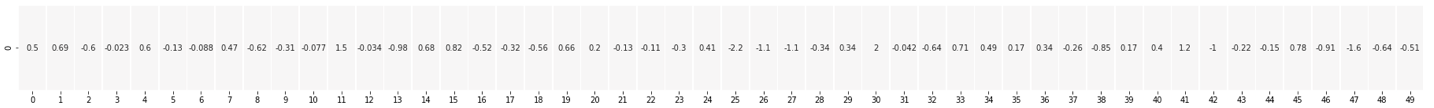



We can add color to the cells based on their values (red if they’re close to 2, white if they’re close to 0, blue if they’re close to -2):
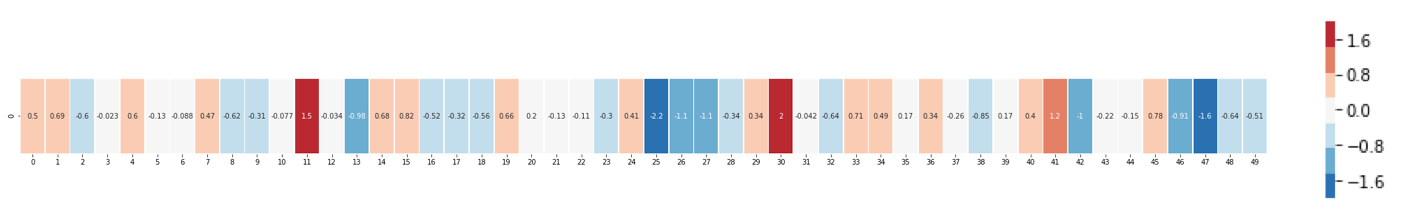

In [72]:
import seaborn as sns
def plot_embeddings(vectors, labels=None):
    n_vectors = len(vectors)
    fig = plt.figure(figsize=(12, n_vectors))
    # ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    # ax = fig.add_axes([1, 1, 1, 1])
    ax = plt.gca()
    
    sns.heatmap(vectors, cmap='RdBu', vmax=2, vmin=-2, ax=ax)
    
    if labels:
        ax.set_yticklabels(labels,rotation=0)
        ax.tick_params(axis='both', which='major', labelsize=30)
        
    plt.tick_params(axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    
    # From https://github.com/mwaskom/seaborn/issues/1773
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!

[ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]


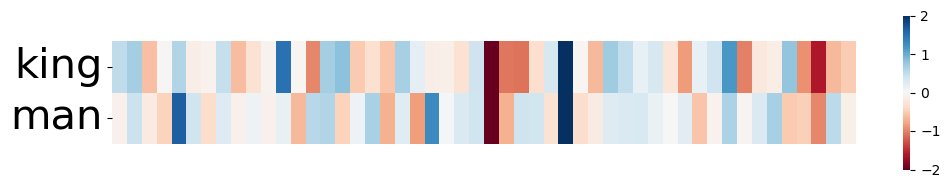

In [49]:
print(embeddings['king'])
plot_embeddings([embeddings['king'],embeddings['man']], ['king','man'])

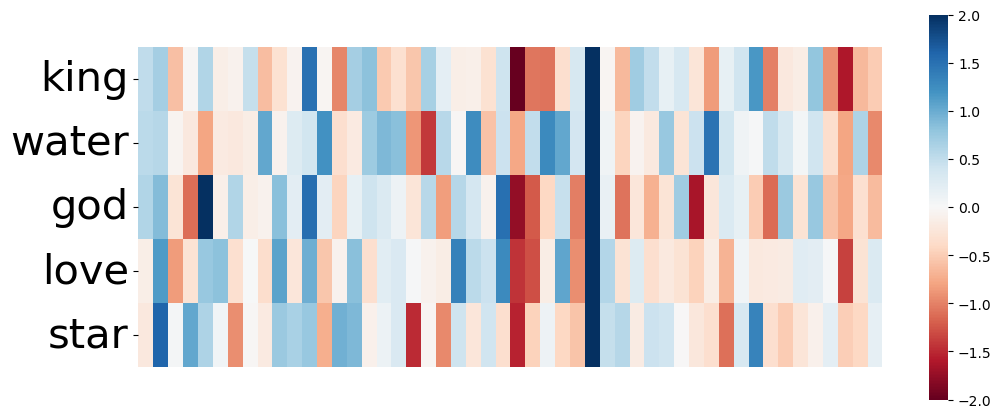

In [73]:
plot_embeddings([embeddings['king'], embeddings['water'], embeddings['god'], embeddings['love'], embeddings['star']],
              ['king', 'water', 'god', 'love', 'star'])

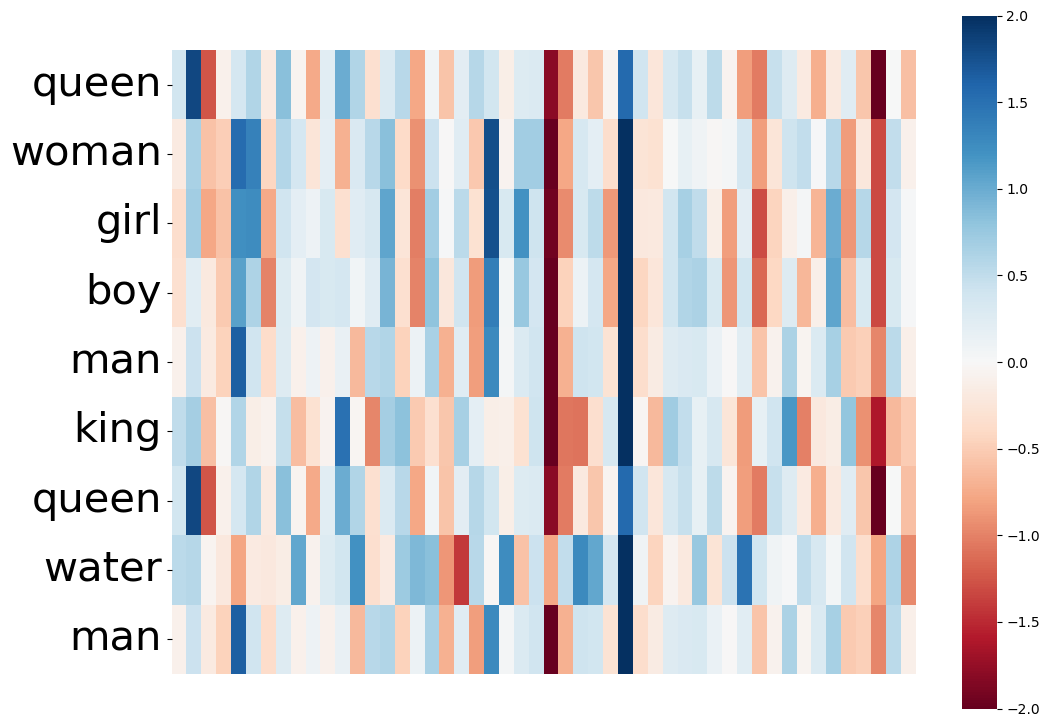

In [80]:
#Here’s another list of examples (compare by vertically scanning the columns looking for columns with similar colors):

plot_embeddings([embeddings['queen'], embeddings['woman'], embeddings['girl'], embeddings['boy'], embeddings['man'],embeddings['king'],embeddings['queen'],embeddings['water'],embeddings['man']],
              ['queen', 'woman', 'girl', 'boy', 'man','king', 'queen', 'water', 'man'])

A few things to point out:

+ There’s a straight red column through all of these different words. They’re similar along that dimension (and we don’t know what each dimensions codes for)
+ You can see how “woman” and “girl” are similar to each other in a lot of places. The same with “man” and “boy”
+ “boy” and “girl” also have places where they are similar to each other, but different from “woman” or “man”. Could these be coding for a vague conception of youth? possible.
+ All but the last word are words representing people. I added an object (water) to show the differences between categories. You can, for example, see that blue column going all the way down and stopping before the embedding for “water”.
+ There are clear places where “king” and “queen” are similar to each other and distinct from all the others. Could these be coding for a vague concept of royalty?

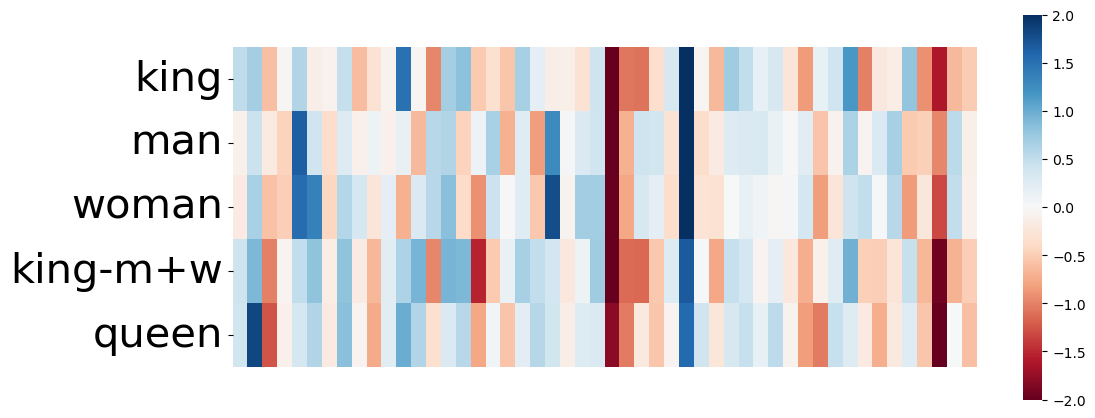

In [87]:
#another way to understand word embedding

plot_embeddings([embeddings['king'],embeddings['man'],embeddings['woman'],embeddings['king']-embeddings['man']+embeddings['woman'],embeddings['queen']], ['king','man','woman','king-m+w','queen'])

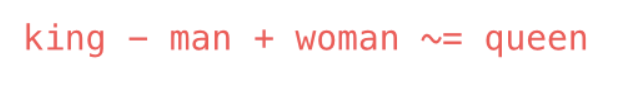

To understand better how we organize the embeddings we will print the first 5 word embeddings.

In [50]:
for i, (k, v) in enumerate(embeddings.items()):
  print('{} -> {}...'.format(k, v[:5]))
  if i == 5:
    break

the -> [ 0.418    0.24968 -0.41242  0.1217   0.34527]...
, -> [ 0.013441  0.23682  -0.16899   0.40951   0.63812 ]...
. -> [ 0.15164  0.30177 -0.16763  0.17684  0.31719]...
of -> [ 0.70853  0.57088 -0.4716   0.18048  0.54449]...
to -> [ 0.68047  -0.039263  0.30186  -0.17792   0.42962 ]...
and -> [ 0.26818   0.14346  -0.27877   0.016257  0.11384 ]...


#### The First experiment - Get closest embeddings

First, we define a function that will help us to get the top k similar embeddings to a word. The distance is computed via the euclidean distance

$ d(x, y) = (\sum_{k=1}^{n} | x_k - y_k |^2)^{1/2} $

> Note: Try to understand this function because it will be crucial with the following experiments.

In [ ]:
def get_closest(x, top_k=3):
  """
  Get the closest embeddings calculating the euclidean distance

  Parameters
  ----------
  x: np.ndarray
    Vector containing an embedding
  top_k: int, optional
    Get the top k similar embeddings

  Returns
  -------
  dict
    Dict containing the top k similar embeddings to the given x
  """
  # Stack all embeddings in a single matrix. Note: the matrix dimention will be
  # V x D where V is the vocabulary size and D is the embedding dimension
  embedding_matrix = np.array(list(embeddings.values()))
  # Using broadcasting compute distance to each embedding in our vocabulary
  distances = x - embedding_matrix
  # Comoute the magnitude of each distance
  distances = np.linalg.norm(distances, axis=1)
  # Sort distance and keep the smallest k
  min_idx = np.argsort(distances)[:top_k]
  return {list(embeddings)[i]: embedding_matrix[i] for i in min_idx}

Now we are going to retrieve the top 5 similar embeddings near to the token `dog`. If our intuition that word embeddings encode semantics we will get the embeddings corresponding to tokens like `pet`, `dogs`, etc.

In [51]:
similar_animal = get_closest(embeddings['dog'], top_k=10)
list(similar_animal)

['dog',
 'cat',
 'dogs',
 'puppy',
 'rabbit',
 'pet',
 'horse',
 'pig',
 'pack',
 'cats']

Wow! Our embeddings know how to represent a dog into a vector space. As we see, embeddings encode a lot of interesting features. For example, in this case, `dog` is very related to:
- `dogs` which it is its plural
- `cat` which is another `pet`
- and also to `puppy` which is a little dog.

Fortunately, we can plot those embeddings in a 2D space to then better visualize them and understand how these semantics are encoded in a 2D space.

As you might notice, the embeddings that we are working with are 300-dimensional. So a question that instantly comes to our minds is: How can we plot a vector in a 300-dimensional space!?. The answer is simple, we can reduce a vector dimensionality using Principal Component Analysis (PCA). PCA allows us to project vectors to a lower-dimensional space without losing much information. To learn more about PCA refer to the [PCA sklearn User Guide](https://scikit-learn.org/stable/modules/decomposition.html#pca).

We are going to encapsulate the complexity (sklearn does the complex part 🙄) of the plot inside a function.

In [52]:
import matplotlib.pyplot as plt
from sklearn.decomposition  import PCA

def to_2d(embeddings):
  # To reduce embedding dims without losing much information we use PCA
  pca = PCA(n_components=2, whiten=True)
  pca.fit(embeddings)
  return pca.transform(embeddings)


def annotated_scatter(points, names, color='blue'):
  x_coords = points[:, 0]
  y_coords = points[:, 1]

  plt.scatter(x_coords, y_coords, c=color)
  for label, x, y in zip(names, x_coords, y_coords):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

  plt.xlim(x_coords.min() - .5, x_coords.max() + .5)
  plt.ylim(y_coords.min() - .5, y_coords.max() + .5)


def plot_embeddings(embeddings, names, color='blue', show=True):
  X_train = np.array([embeddings[k] for k in names])

  embeddings_2d = to_2d(X_train)

  annotated_scatter(embeddings_2d, names, color)
  plt.grid()

  if show:
    plt.show()

Now we will plot the embeddings similar to `dog` and embeddings similar to `computer`. This way we will be able to see two clusters of embeddings, one cluster for tokens related to pets and another cluster for tokens related to techology.

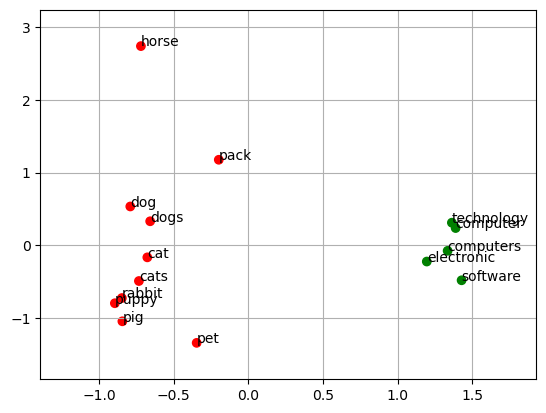

In [53]:
near_dog = list(similar_animal)
near_computer = list(get_closest(embeddings['computer'], top_k=5))

plot_embeddings(embeddings,
                near_dog + near_computer,
                color=['red'] * len(near_dog) + ['green'] * len(near_computer));

Interesting, isn't it? Now, we have seen that embeddings encode word semantics and therfore we can use it to get words with similar meanings. That is important for deep learning tasks such as sentiment analysis, document classification, topic extraction, etc.

Interestingly, when we train word embeddings from scratch for a sentiment analysis task, we end up learning embeddings that their representation is composed of two clusters.
1. one cluster for positive tokens
2. and another for negative tokens.

We can see this phenomenon in the following image.

<img src=" 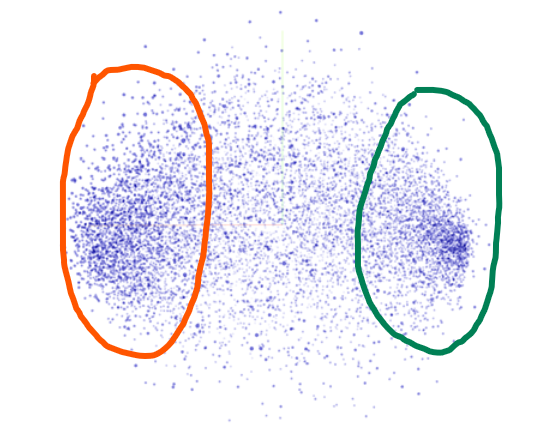">


#### The second Experiment - Adding two embeddings

Before adding 2 embeddings and observe interesting properties, we first need to identify the linear substructures. We can think of linear substructures as relationships that exist between words. Some linear substructures include:

- Man ~ Woman -> Linear Substructure: Gender
- King ~ Queen -> Linear Substructure: Gender
- Dog ~ Canine -> Linear Substructure: Specie
- Cat ~ Feline -> Linear Substructure: Specie

Now, we are going to define a new function to plot pairs of linear substructures.

In [76]:
from collections import namedtuple
import matplotlib.lines as mlines
from matplotlib import cm

LinearSubs = namedtuple('LinearSubs',
                        ('word_pair', 'name'))

def plot_linear_substructures(embedding, linear_subs):
  embeddings = embedding 
  embeddings_matrix = [embeddings[p] for ls in linear_subs for p in ls.word_pair]
  embeddings_matrix = np.array(embeddings_matrix)

  pair_names = [p for ls in linear_subs for p in ls.word_pair]
  ls_names = [ls.name for ls in linear_subs]
  embeddings_2d = to_2d(embeddings_matrix)

  annotated_scatter(embeddings_2d,
                    pair_names,
                    cm.Set1.colors[:len(embeddings_2d)])

  for i in range(0, len(embeddings_2d), 2):
    p1 = embeddings_2d[i]
    p2 = embeddings_2d[i + 1]
    # Center of the linear substructure
    center = [(p1[i] + p2[i]) / 2 + .04 for i in range(2)]

    plt.plot(*zip(p1, p2), '--')
    plt.annotate(ls_names[i // 2],
                 xy=center,
                 xytext=(0, 0), textcoords='offset points')

In the following plot we can see three different interesting linear substructures:

1. Sex: We use this linear structure to convert from male to female
2. Family: Given an animal species, such as cat, we can get its family using the species linear substructure
3. Product: Given a brand name like Samsung exists a linear relation to the kind of product that they manufacture.

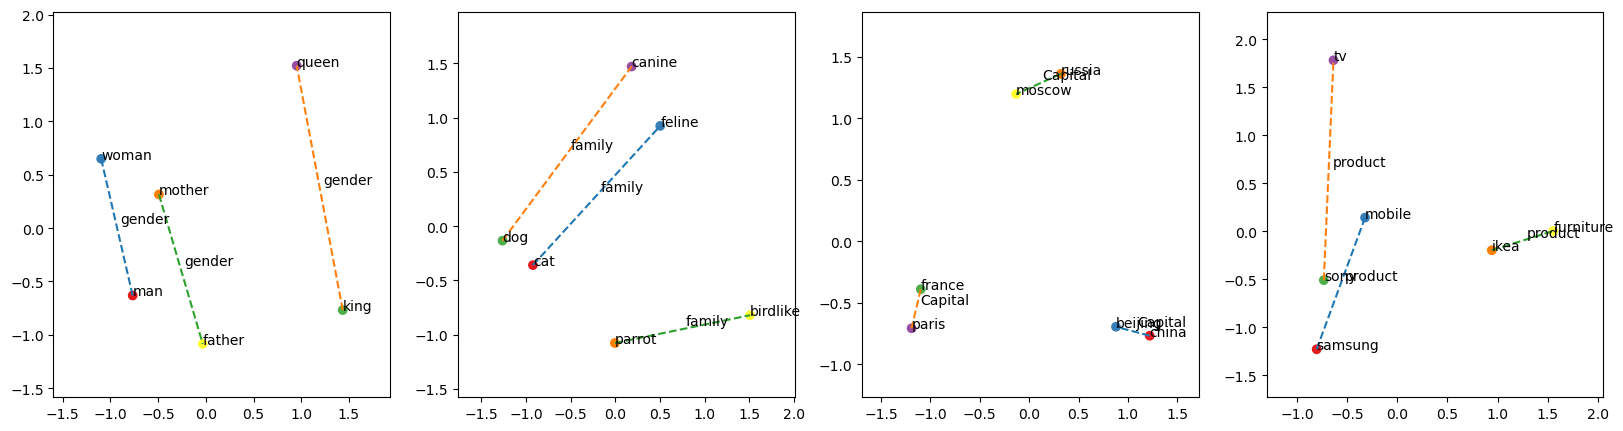

In [78]:
plt.figure(figsize=(20, 5))

plt.subplot(141)
plot_linear_substructures(embeddings, [LinearSubs(('man', 'woman'), 'gender'),
                           LinearSubs(('king', 'queen'), 'gender'),
                           LinearSubs(('mother', 'father'), 'gender')])

plt.subplot(142)
plot_linear_substructures(embeddings, [LinearSubs(('cat', 'feline'), 'family'),
                           LinearSubs(('dog', 'canine'), 'family'),
                           LinearSubs(('parrot', 'birdlike'), 'family')])
plt.subplot(143)
plot_linear_substructures(embeddings, [LinearSubs(('china', 'beijing'), 'Capital'),
                           LinearSubs(('france', 'paris'), 'Capital'),
                           LinearSubs(('russia', 'moscow'), 'Capital')])


plt.subplot(144)
plot_linear_substructures(embeddings, [LinearSubs(('samsung', 'mobile'), 'product'),
                           LinearSubs(('sony', 'tv'), 'product'),
                           LinearSubs(('ikea', 'furniture'), 'product')])

In [74]:
# Dict
# key -> the token (word)
# value -> word embedding
embeddings2 = {}
with open('glove.6B.300d.txt',encoding="utf8") as f:
  embeddings2 = {l.split()[0]: np.array(l.split()[1:]).astype('float') for l in f}

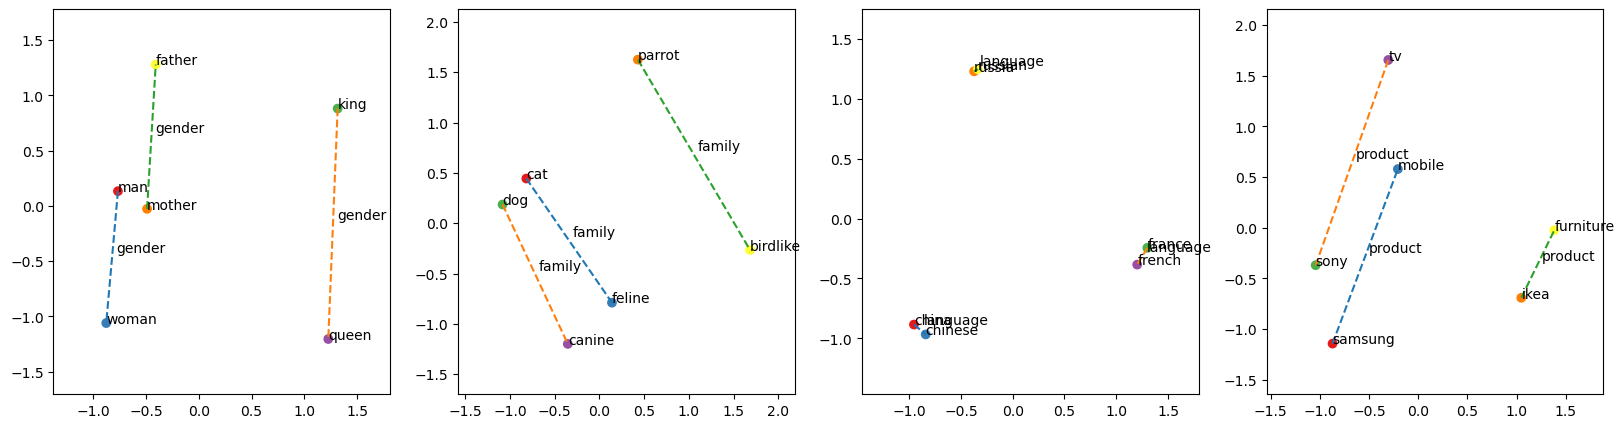

In [79]:
plt.figure(figsize=(20, 5))

plt.subplot(141)
plot_linear_substructures(embeddings2,[LinearSubs(('man', 'woman'), 'gender'),
                           LinearSubs(('king', 'queen'), 'gender'),
                           LinearSubs(('mother', 'father'), 'gender')])

plt.subplot(142)
plot_linear_substructures(embeddings2,[LinearSubs(('cat', 'feline'), 'family'),
                           LinearSubs(('dog', 'canine'), 'family'),
                           LinearSubs(('parrot', 'birdlike'), 'family')])
plt.subplot(143)
plot_linear_substructures(embeddings2,[LinearSubs(('china', 'chinese'), 'language'),
                           LinearSubs(('france', 'french'), 'language'),
                           LinearSubs(('russia', 'russian'), 'language')])


plt.subplot(144)
plot_linear_substructures(embeddings2,[LinearSubs(('samsung', 'mobile'), 'product'),
                           LinearSubs(('sony', 'tv'), 'product'),
                           LinearSubs(('ikea', 'furniture'), 'product')])

In [ ]:
Once, we have identified the linear substructures, we can use them to "approximate" other embeddings. For example:

- If we add the linear substructure `gender` to the word "son", then we will find an embedding that is close to `daughter` representation.

- The same would happen if we add the linear substructure `species` to an animal species.

See the below execution to corroborate this theory.

In [98]:
def get_linear_subs_vect(ls):
  return embeddings[ls.word_pair[1]] - embeddings[ls.word_pair[0]]


sex_ls = get_linear_subs_vect(LinearSubs(('man', 'woman'), 'gender'))
specie_ls = get_linear_subs_vect(LinearSubs(('canine', 'dog'), 'species'))

print('"Son" + male to female =', list(get_closest(embeddings['son'] + sex_ls, top_k=1)))
print('"Salmon" 🐟 + animal to specie =', list(get_closest(embeddings['salmon'] + specie_ls, top_k=5)))
print('"king" + male to female =', list(get_closest(embeddings['king'] + sex_ls, top_k=2)))
print('"father" + male to female =', list(get_closest(embeddings['father'] + sex_ls, top_k=1)))

"Son" + male to female = ['daughter']
"Salmon" 🐟 + animal to specie = ['salmon', 'fish', 'trout', 'tuna', 'crab']
"king" + male to female = ['king', 'queen']
"father" + male to female = ['mother']


As expected it works 😊. Let see what we exactly did:

1. First, we retrieved the vector which represents the linear substructure. To do so, we subtract two embeddings which are related by a known linear substructure. For example, subtracting `man` embedding to `woman` embedding results in the male to female linear substructure vector.
2. Then, we add this vector to a random embedding. In our case, instead of a random embedding, we chose "Son" embedding because it has a straight forward female "version", therefore we know that the expected output should be "daughter".
3. Finally, we get the top k closest embeddings to the result of the addition and check if the linear substructure is still valid for the recently pciked embedding.

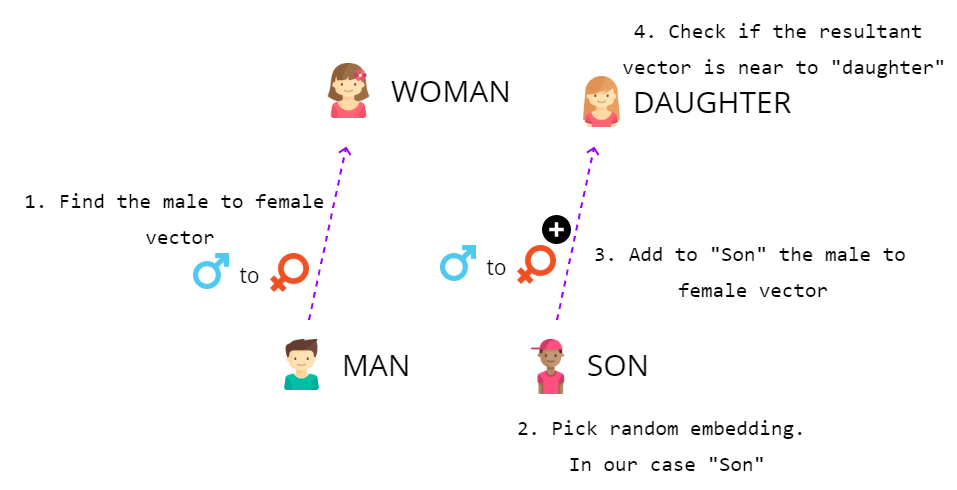</img>


How to get word vector?

If you are given the following two sentences, what information can you summarize?
XXX is a delicious fruit.
YYY is a delicious fruit.

The conclusion would be that XXX and YYY are quite similar. This is reflected by the following observation:   

“You shall know a word by the company it keeps.”   J.R.Firth 1957【英国语言学家】

Another example is:

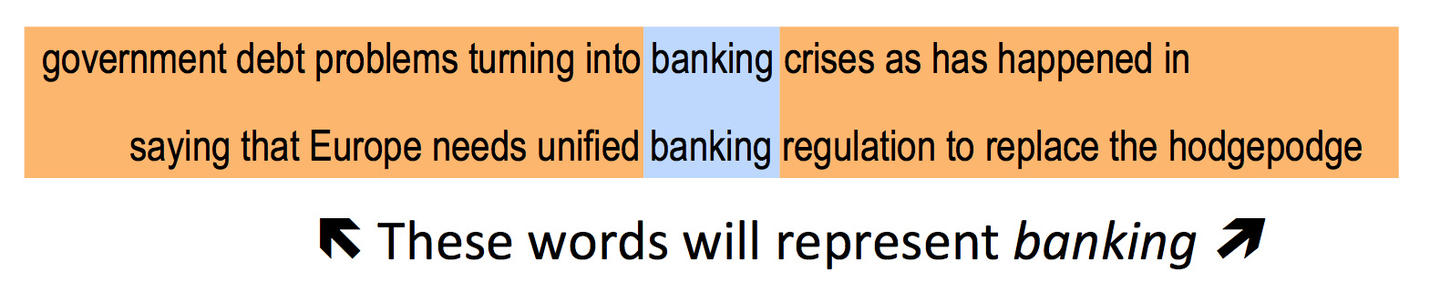
That is, even the words are the same, depending on their context, they have different meanings, therefore, should be represented with different vectors.

 Words get their embeddings by us looking at which other words they tend to appear next to. The mechanics of that is that

We get a lot of text data (say, all Wikipedia articles, for example). then
We have a window (say, of three words) that we slide against all of that text.
The sliding window generates training samples for our model

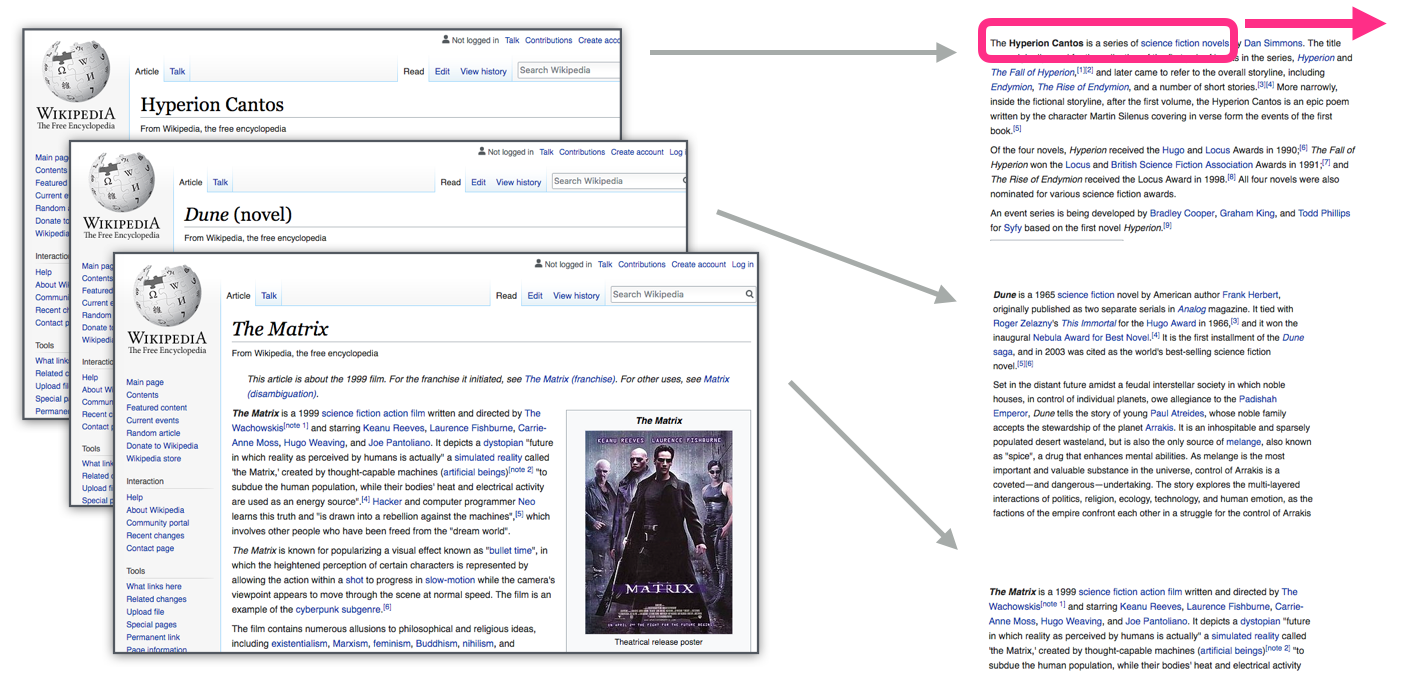



As this window slides against the text, we (virtually) generate a dataset that we use to train a model. To look exactly at how that’s done, let’s see how the sliding window processes this phrase:

“Thou shalt not make a machine in the likeness of a human mind” ~Dune

When we start, the window is on the first three words of the sentence:

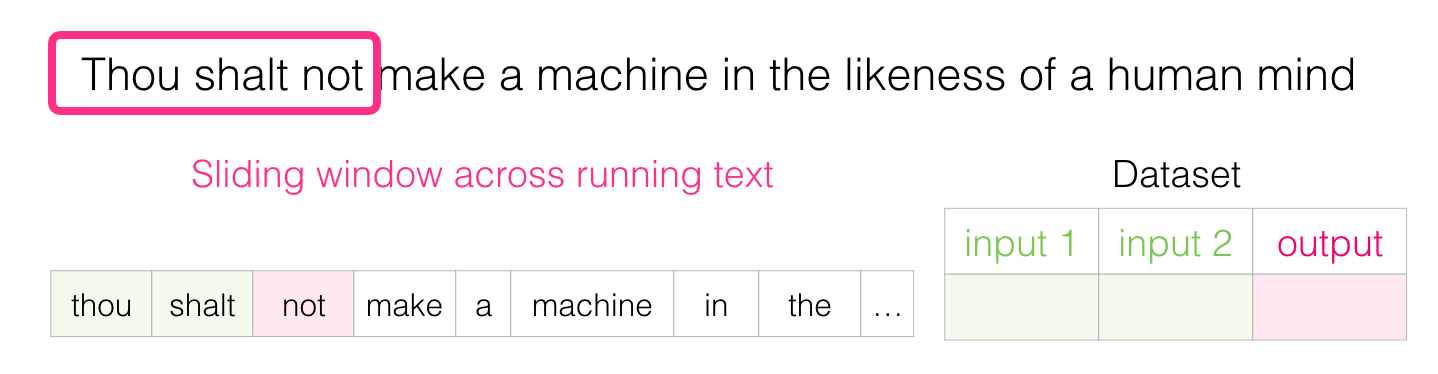

We take the first two words to be features, and the third word to be a label:

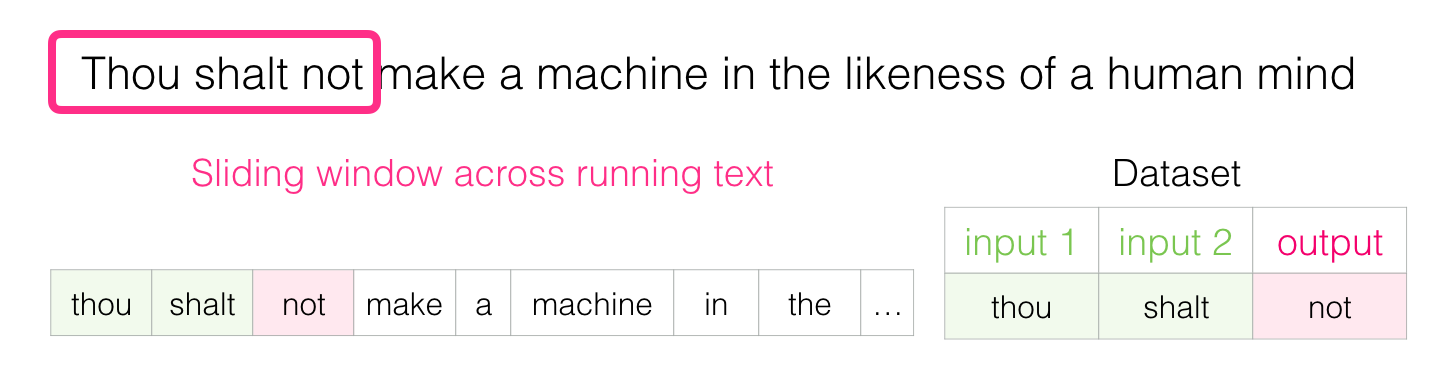

We now have generated the first sample in the dataset we can later use to train a language model.

We then slide our window to the next position and create a second sample:

An the second example is now generated.
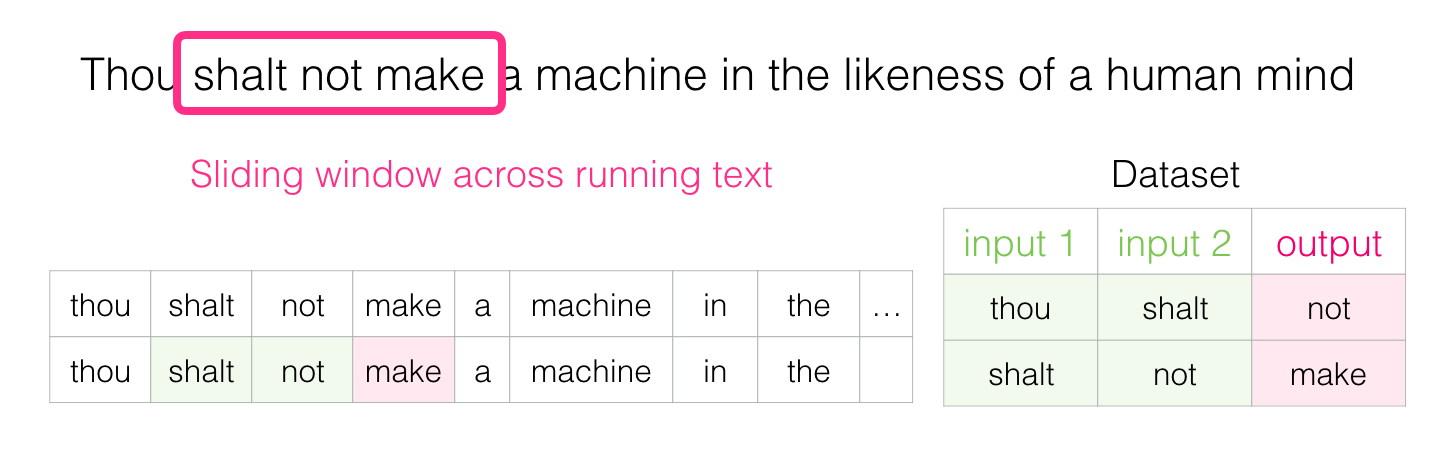

And pretty soon we have a larger dataset of which words tend to appear after different pairs of words:

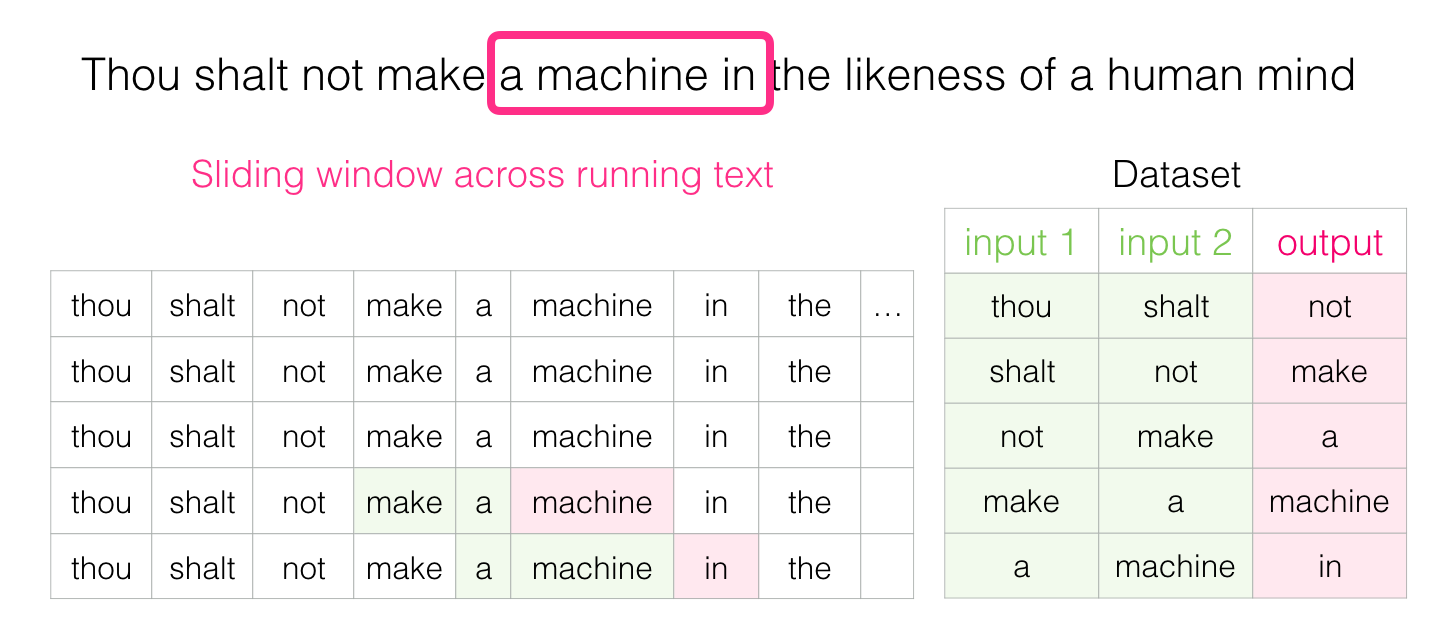



Suppose finally we have such a table:

  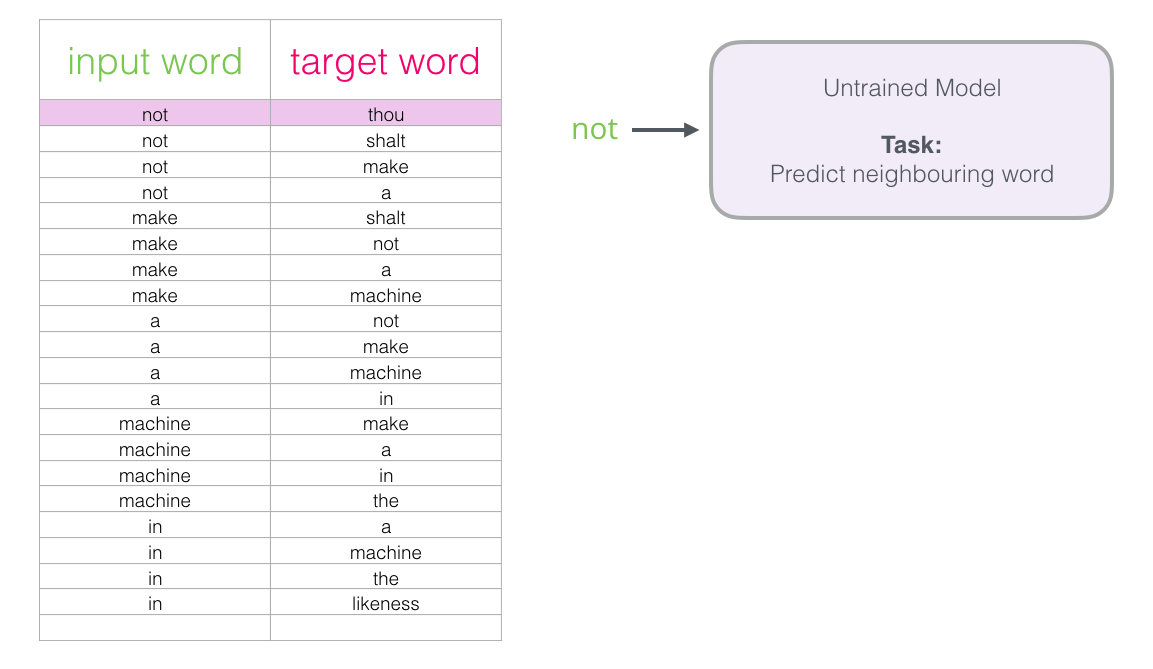  

We start with the first sample in our dataset. We grab the feature and feed to the untrained model asking it to predict an appropriate neighboring word.

<img src="skipgram1.png" style="zoom:50%">

The model conducts the three steps and outputs a prediction vector (with a probability assigned to each word in its vocabulary). Since the model is untrained, it’s prediction is sure to be wrong at this stage. But that’s okay. We know what word it should have guessed – the label/output cell in the row we’re currently using to train the model:The 'target vector' is one where the target word has the probability 1, and all other words have the probability 0.

 <img src="skipgram2.png" style="zoom:50%">   

How far off was the model? We subtract the two vectors resulting in an error vector:

 <img src="skipgram3.png" style="zoom:50%">  

This error vector can now be used to update the model so the next time, it’s a little more likely to guess thou when it gets not as input.

 <img src="skipgram4.png" style="zoom:50%">  

And that concludes the first step of the training. We proceed to do the same process with the next sample in our dataset, and then the next, until we’ve covered all the samples in the dataset. That concludes one epoch of training. We do it over again for a number of epochs, and then we’d have our trained model and we can extract the embedding matrix from it and use it for any other application.

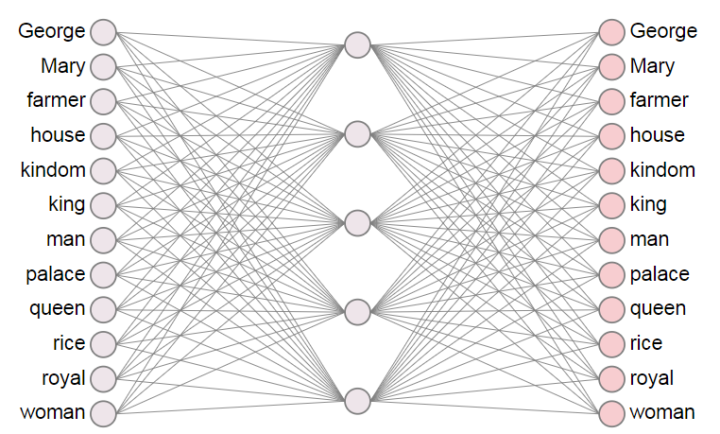

## Conclusions

That's all for this article. I hope you enjoy it.

Important takeaways:

- Intelligent models cannot receive raw text as input, so we need to convert text to numbers. This process is called *vectorizing*.
- Even though, One Hot Encoding is memory inefficient in some small vocabularies may be the way to go.
- A more powerful technique to vectorize a vocabulary is word embedding. Word Embedding can encode semantics.
- Word Embeddings can be download from the internet (pretrained) or we can learn them from scratch jointly with our task.
- We can use the Word Embedding semantics to perform some operations on them.
  - Get k nearest neighbors
  - Approximate embeddings using observed linear substructures.

Thanks for reading my article. I am looking forward to seeing you again on my blog.

## References
 <a id="references"></a>
- [1] Deep Learning with Python - François Chollet <a id="ref-1"></a>
- [2] BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding - https://arxiv.org/abs/1810.04805
- [3] RoBERTa: An optimized method for pretraining self-supervised NLP systems - https://arxiv.org/abs/1907.11692
- [4] GloVe: Global Vectors for Word Representation - https://nlp.stanford.edu/projects/glove/